In [42]:
import numpy as np
import pandas as pd
from matplotlib import pylab 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [43]:
import scipy as sp
from sklearn.cluster import ward_tree,KMeans
from sklearn.cluster.hierarchical import linkage_tree

In [44]:
from sklearn.decomposition import PCA
import matplotlib as mpl

In [60]:
mpl.rcParams.get("font.family")
font = {"family":"IPAexGothic"}
mpl.rc('font', **font)
print()

In [46]:
df = pd.read_csv("tokushou.csv")

In [47]:
df

,サンプル名,跳躍割合,上向跳躍割合,下降跳躍割合,音域,音価エントロピー,タイの数,音価コスト,テンポ,音価コストとテンポの積,変化割合,ピッチエントロピー,MSDR,音価変化割合,平均,メジアン,最低音,最高音
0,LemonA,0.490,0.210,0.280,16,1.960,14,7.36,87,640.32,0.3180,2.34,0.331,0.6460,55.2,55,47,63
1,LemonB,0.140,0.028,0.110,13,1.080,4,6.15,97,596.55,0.1630,2.06,0.341,0.3640,61.1,62,52,65
2,Lemonサビ,0.160,0.081,0.081,10,0.847,11,4.33,190,822.70,0.1350,1.43,0.366,0.3120,61.1,61,56,66
3,ultrasoulA,0.093,0.047,0.047,13,1.890,4,6.53,87,568.11,0.2670,1.93,0.217,0.6960,58.7,59,51,64
4,ultrasoulB,0.240,0.200,0.044,9,1.530,4,6.37,97,617.89,0.1460,1.65,0.224,0.8940,63.9,64,60,69
5,ultrasoulサビ,0.230,0.083,0.150,14,1.050,7,5.05,165,833.25,0.2950,1.77,0.430,0.4180,53.0,53,45,59
6,キセキA,0.330,0.150,0.180,20,1.650,18,5.12,87,445.44,0.1950,2.17,0.105,0.8950,60.7,59,51,71
7,キセキB,0.150,0.150,0.000,9,0.367,8,6.76,202,1365.52,0.2760,1.87,0.564,0.1450,51.8,52,47,56
8,キセキサビ,0.470,0.310,0.160,14,0.854,2,4.80,165,792.00,0.6220,2.15,0.658,0.2890,56.0,57,50,64
9,チェリーA,0.240,0.160,0.080,10,1.070,4,4.02,127,510.54,0.2500,1.75,0.424,0.3940,58.5,59,54,64


In [48]:
df = df.set_index(["サンプル名"])

In [49]:
pca = PCA(n_components=2)

In [50]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
print("寄与率{},{},{}".format(pca.explained_variance_ratio_,pca.components_,pca.mean_))

寄与率[0.98119553 0.01684382],[[-1.29238065e-04 -2.43198731e-05 -1.07346407e-04 -2.00321352e-03
  -7.85614154e-04 -2.44025391e-03 -7.16278583e-05  1.63907668e-01
   9.86333951e-01 -3.65241742e-06 -4.98798756e-05  8.58122159e-05
  -2.73710195e-04 -8.04157851e-03 -8.17735593e-03 -6.87805534e-03
  -9.49029851e-03]
 [ 1.85922311e-03  4.37449201e-04  1.40576758e-03 -8.09551236e-04
  -5.39292789e-03 -7.34012961e-02 -4.02193870e-02  9.80978221e-01
  -1.62135148e-01  2.78186025e-03 -1.73845867e-03  3.17558516e-03
  -2.64598043e-03  2.83745956e-02  3.57921680e-02  3.62191692e-02
   3.04522465e-02]],[2.39933333e-01 1.26033333e-01 1.13333333e-01 1.28000000e+01
 1.10796667e+00 7.93333333e+00 5.64333333e+00 1.29400000e+02
 7.00430000e+02 2.54983333e-01 1.88200000e+00 4.06433333e-01
 4.48176667e-01 5.96300000e+01 5.97666667e+01 5.29333333e+01
 6.59000000e+01]


In [52]:
data_2d = pca.transform(df)
df_2d = pd.DataFrame(data_2d)
df_2d.index = df.index
df_2d.columns = ["PC1","PC2"]

In [53]:
df_2d

,PC1,PC2
サンプル名,,
LemonA,-66.117427,-32.969231
LemonB,-107.776894,-14.613121
Lemonサビ,130.486405,39.654856
ultrasoulA,-137.407855,-20.074503
ultrasoulB,-86.852886,-17.519467
ultrasoulサビ,137.068662,12.552445
キセキA,-258.531976,-0.891578
キセキB,668.169856,-37.673650
キセキサビ,96.256081,20.182162


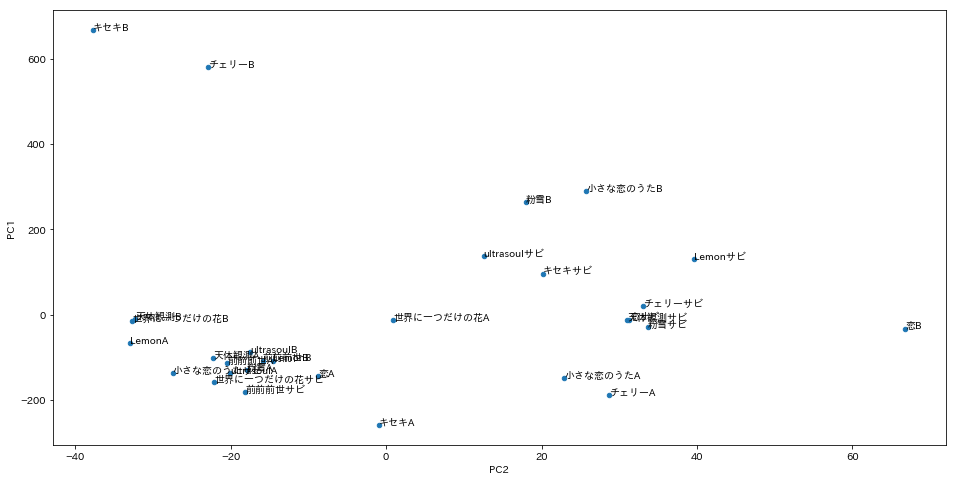

In [54]:
ax = df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
for i, song in enumerate(df.index):
    ax.annotate(  
        song,
       (df_2d.iloc[i].PC2, df_2d.iloc[i].PC1)
    )

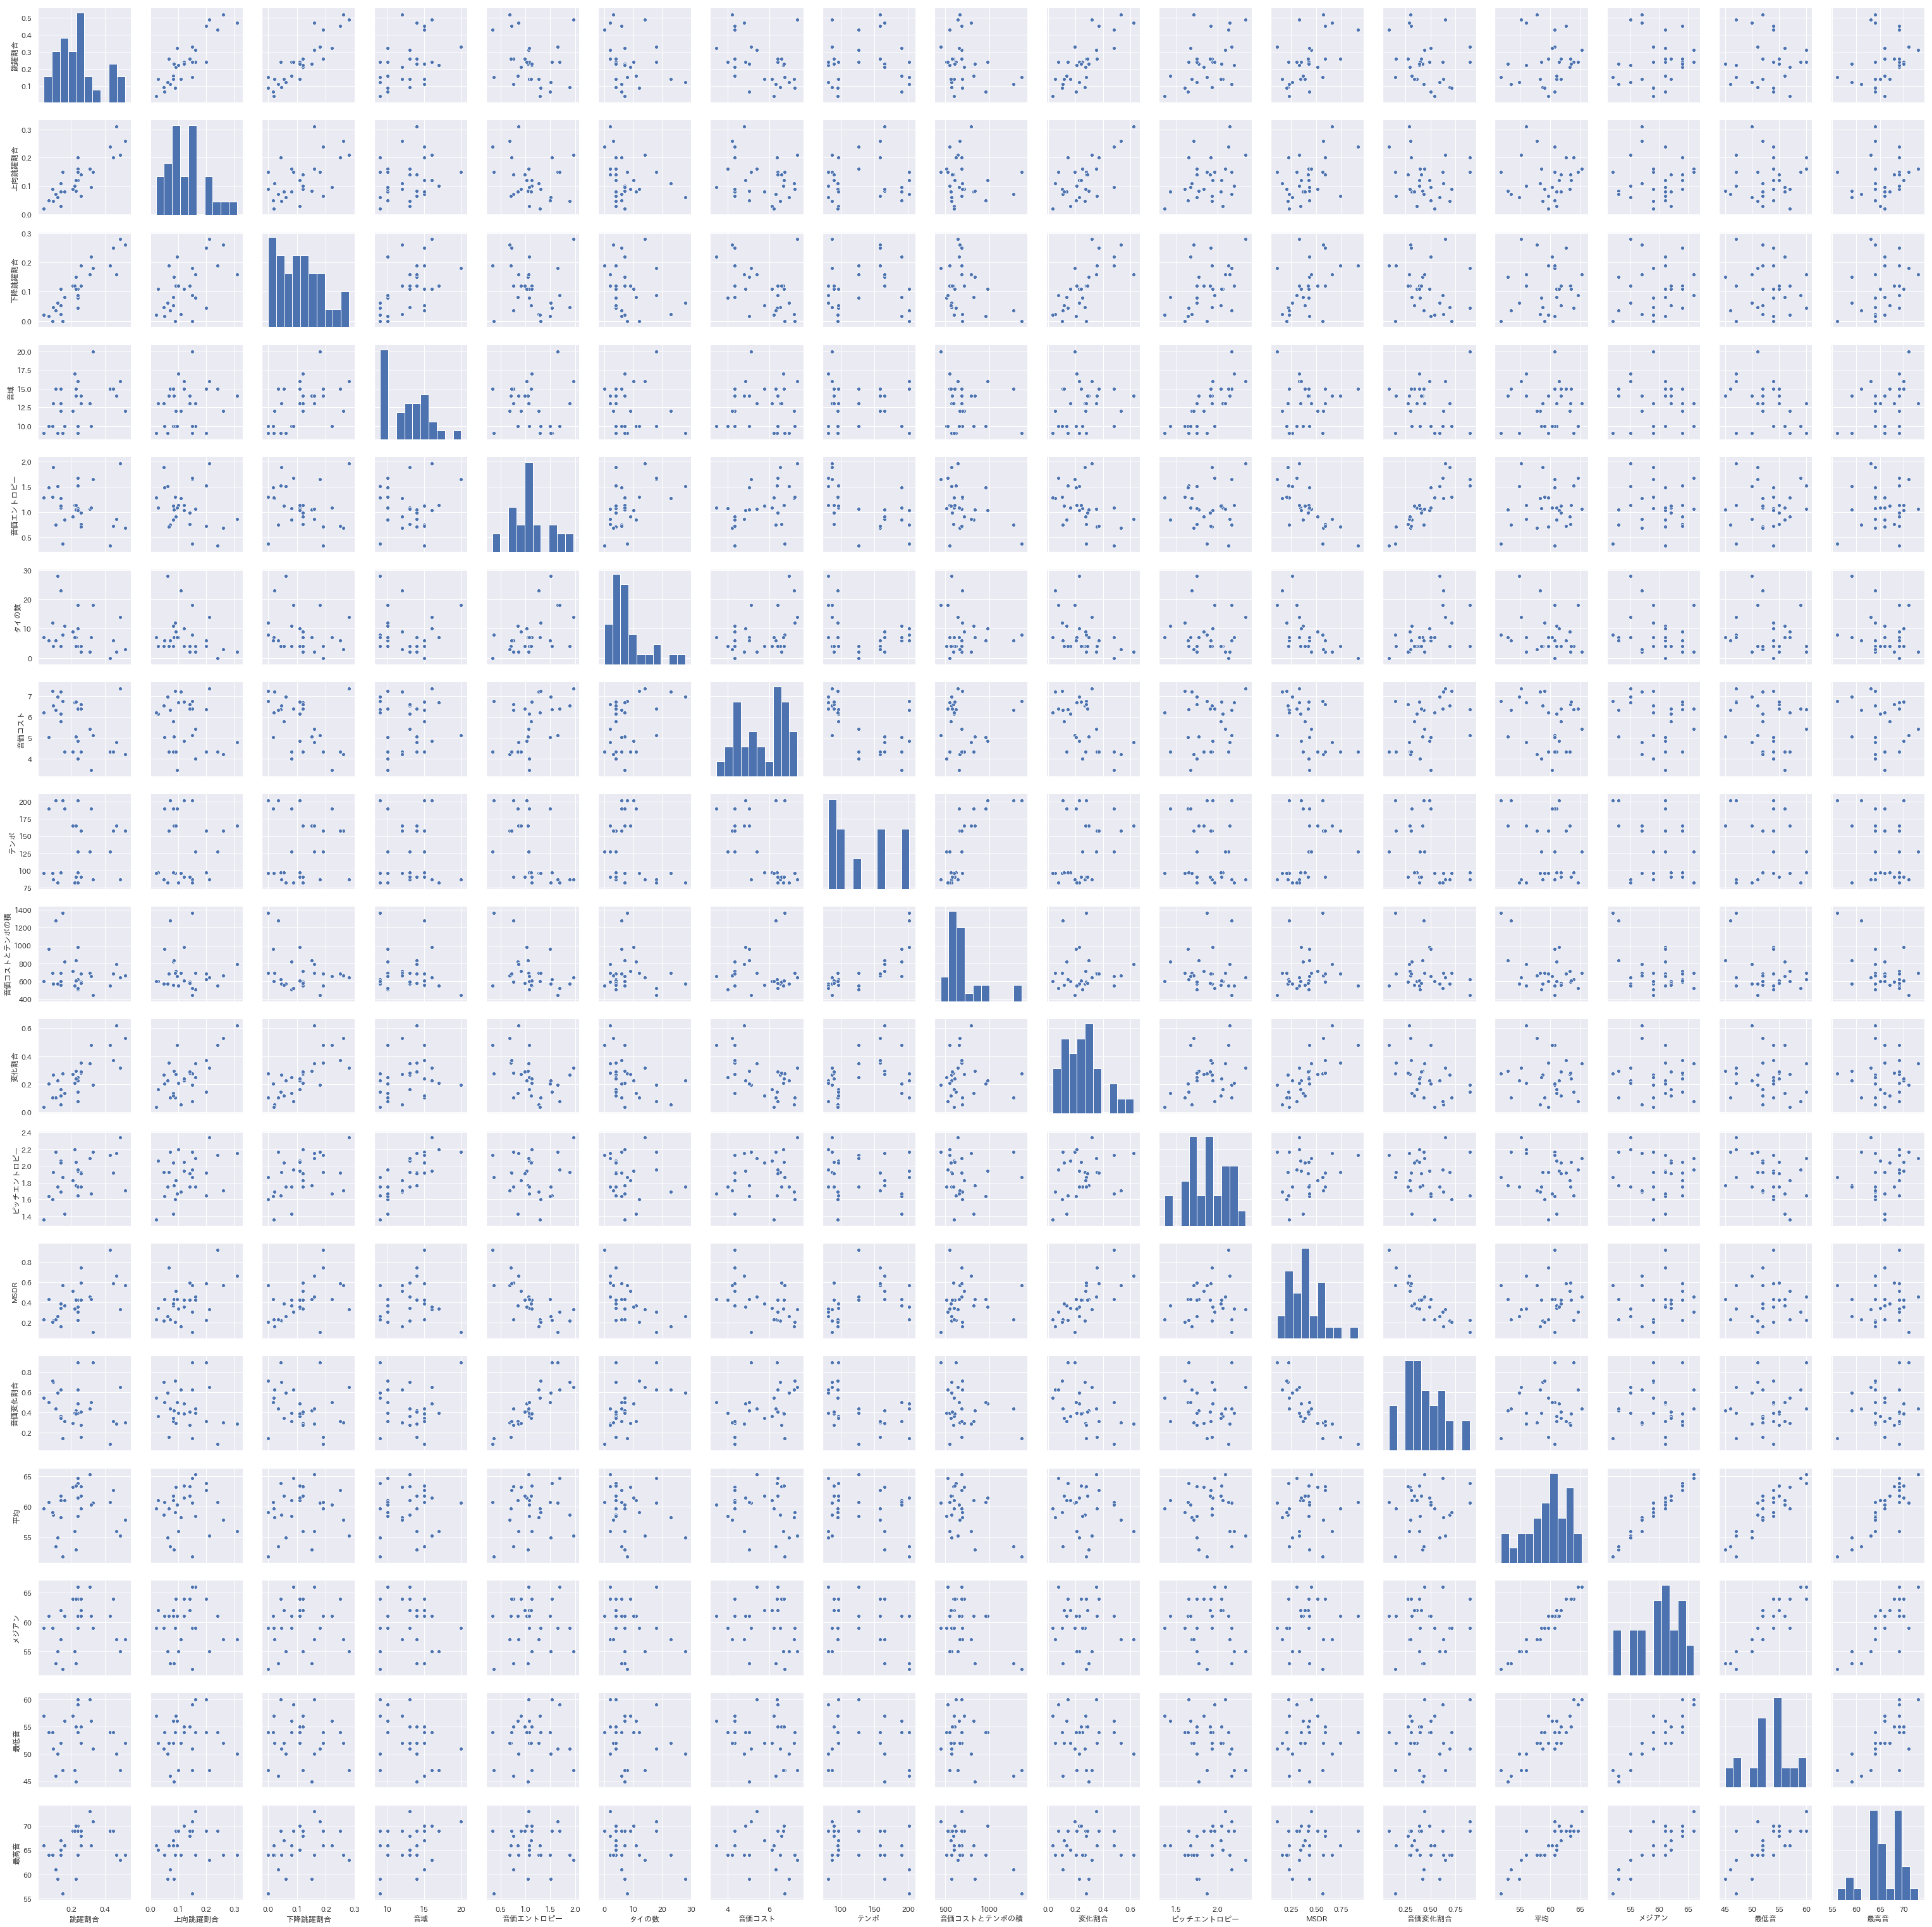

In [61]:
plt.rcParams["figure.figsize"] = (100,100)
sns.pairplot(df)
plt.show()